# Task 2

## Author: Vimal Belwal

## Objective: Predictions using Unsupervised Learning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from io import StringIO
from matplotlib.patches import Patch 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading CSV

In [3]:
orig_url='https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'
file_id=orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url=requests.get(dwn_url).text
csv_raw=StringIO(url)
dfs=pd.read_csv(csv_raw)

In [4]:
dfs.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Dropping unnecessary columns i.e. Id

In [6]:
dfs.drop("Id",axis=1,inplace=True)

### Getting Labels

In [7]:
labels=dfs["Species"]
label_names=labels.unique()
print(label_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Gathering Intel on Data

In [8]:
dfs.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


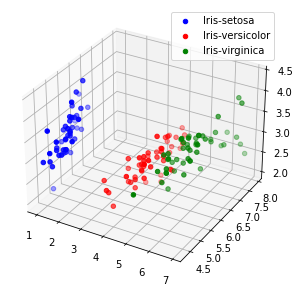

In [11]:
fig=plt.figure(figsize=(5,5))
col=['b','r','g']
ax=plt.axes(projection='3d')
for indx,l in enumerate(label_names):
    df=dfs.loc[dfs['Species']==l]
    ax.scatter(df["PetalLengthCm"],df["SepalLengthCm"],df["SepalWidthCm"],c=col[indx],marker='o',label=l)
ax.legend()
plt.show()

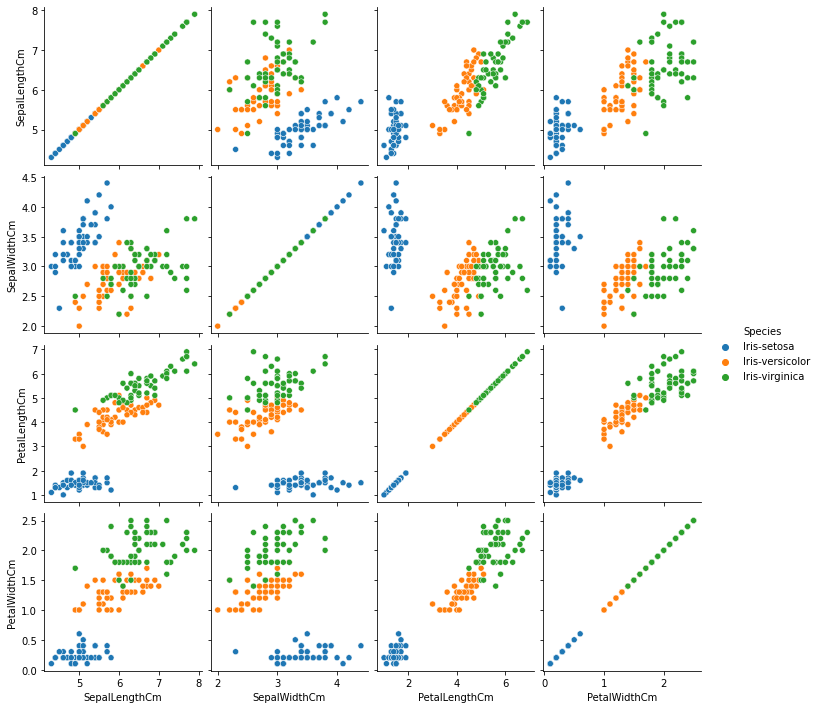

In [12]:
sns.pairplot(dfs,hue='Species',diag_kind=None)

<AxesSubplot:>

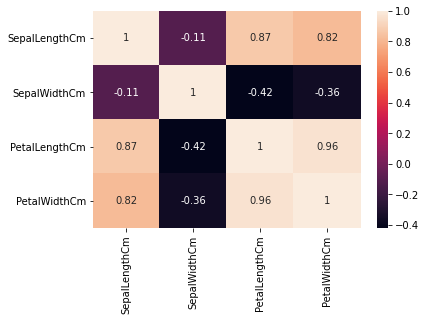

In [13]:
sns.heatmap(dfs.corr(),annot=True)

#### We can see a Strong Correlation between Petal Width and Petal Length exists. Correlation between Petal Width and Petal Length is 0.96 (~1). Hence, we can drop any 1 of those columns.

### Preprocessing data

In [14]:
labels=dfs.drop("Species",axis=1,inplace=True)

In [15]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
dfs.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Normalizing the data

In [17]:
x_vals=dfs.values
scal=StandardScaler()
x_vals=scal.fit_transform(x_vals)

#### Checking for Dimension Reduction using PCA

In [18]:
variance=0.98
pca=PCA(variance)
x_vals=pca.fit_transform(x_vals)

#### Splitting Data in Train and Test sets

In [19]:
x_train,x_test=train_test_split(x_vals)

In [20]:
x_train.shape,x_test.shape

((112, 3), (38, 3))

### Model Training and Checking for optimal parameters

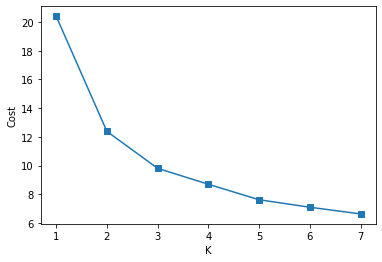

In [21]:
inertia = []
models={}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_train)
    models[k]=kmeans
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('K')
plt.ylabel('Cost');
plt.show()

#### We can see an elbow is formed at k=2 and k=3. Since number of unique labels is 3, we use K=3 for our KMeans clustering model

In [22]:
model=models[3]
predictions=model.labels_
centroids=model.cluster_centers_

In [23]:
centroids

array([[ 1.60435173,  0.50042559,  0.06319118],
       [-2.17848097,  0.22097285, -0.07121886],
       [ 0.5368575 , -0.8822698 ,  0.01205255]])

In [24]:
print(set(predictions))

{0, 1, 2}


### Plotting predictions on Training data

In [25]:
def plot_predictions(x_train):
    label_col=['b','r','g','black']
    l_name=['Cluster_1','Cluster_2','Cluster_3','Cluster Centres']
    prediction=model.predict(x_train)
    fig=plt.figure(figsize=(10,10))
    ax=plt.axes()
    for indx,i in enumerate(prediction):
        ax.scatter(x_train[indx,0],x_train[indx,1],c=label_col[i],alpha=0.5,marker='o')
    ax.scatter(centroids[:,0],centroids[:,1],c='black',s=75,marker='X')
    c_1=[]
    for i in range(len(l_name)):
        p=Patch(color=label_col[i], label=l_name[i])
        if i==len(l_name)-1:
            p.set_alpha(1)
        else:
            p.set_alpha(0.5)
            p.set_hatch('o')
            p.set_joinstyle('round')
        c_1.append(p)
    plt.legend(handles=c_1,loc=1)

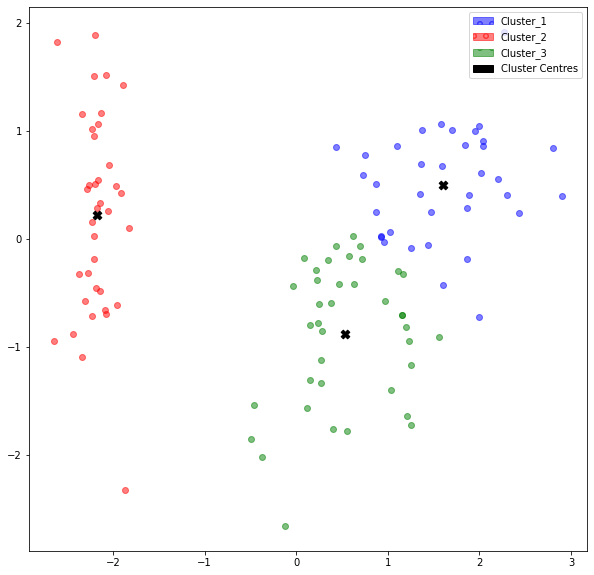

In [26]:
plot_predictions(x_train)

### Plotting Test Predictions

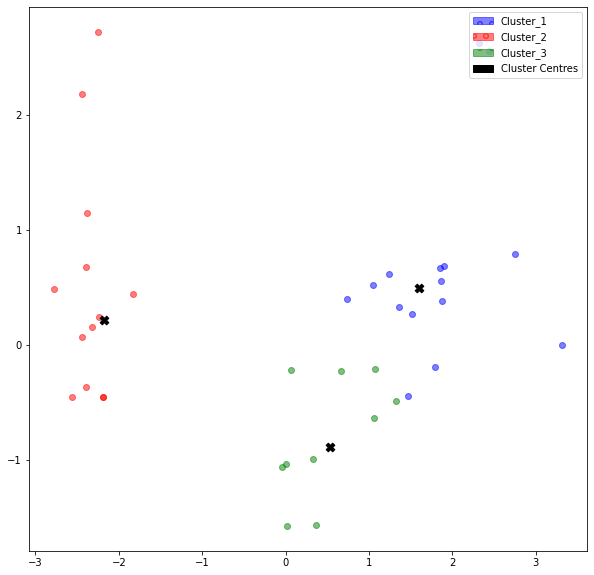

In [27]:
plot_predictions(x_test)

### Plotting Predcitive Clusters of entire data

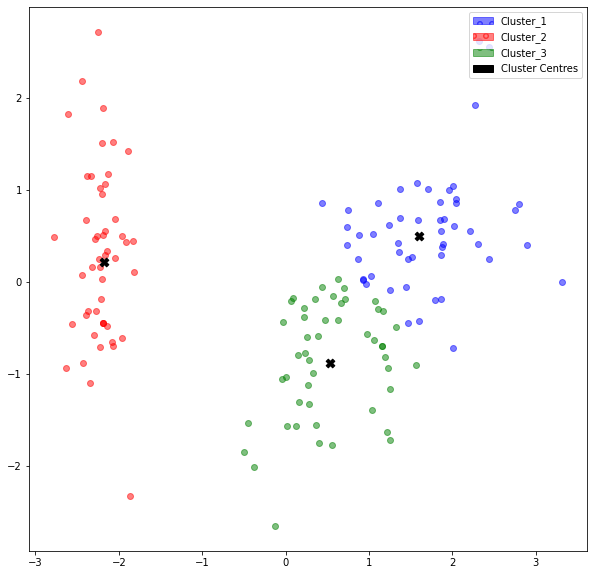

In [28]:
plot_predictions(x_vals)